
# Project: Investigate a Dataset - [FBI NICS Firearm Background Check Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. 

The FBI provides data on the number of firearm checks by month, state, as a PDF and later converted to comma seperated values for analysis purpose, which currently covers November 1998 – July 2022  [Click here to view the csv](https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/f0d436cdbaae0c6614011f09371865b7b6421b42/data/nics-firearm-background-checks.csv). 


### Objective of Analysis
This project 

> Examines the overall trend of the different types of gun purchase, 

> Predict the type of gun that will be acquired more in the coming years, and 

> solves the problem of which which type of gun is most used in the millitary.

In [1]:
#import the needed libaries for the project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the data set

url = "https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv"
df_firearms = pd.read_csv(url)
df_firearms.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2022-07,Alabama,18043.0,313.0,18732.0,11235.0,1411.0,1045,0.0,4.0,...,0.0,0.0,0.0,43.0,15.0,8.0,0.0,1.0,0.0,54307
1,2022-07,Alaska,107.0,59.0,3200.0,2486.0,314.0,214,0.0,1.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,6632
2,2022-07,Arizona,7730.0,1568.0,19301.0,8868.0,1998.0,1228,0.0,13.0,...,0.0,0.0,0.0,10.0,8.0,1.0,0.0,0.0,0.0,42434
3,2022-07,Arkansas,2210.0,367.0,6626.0,4388.0,478.0,371,7.0,5.0,...,0.0,0.0,0.0,10.0,10.0,2.0,1.0,0.0,0.0,16395
4,2022-07,California,22621.0,12734.0,41159.0,23489.0,6090.0,0,0.0,1.0,...,94.0,0.0,0.0,7914.0,3261.0,651.0,33.0,15.0,0.0,120932


In [3]:
# Upgrade pandas to use dataframe.explode() function. 


<a id='wrangling'></a>
## Data Wrangling

> For the data to be easily accessed after being collected from GitHub, It was properly clean.The data was inspected, observed and simplified for understanding and precison.

In [4]:
df_firearms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15675 entries, 0 to 15674
Data columns (total 27 columns):
month                        15675 non-null object
state                        15675 non-null object
permit                       15651 non-null float64
permit_recheck               4290 non-null float64
handgun                      15655 non-null float64
long_gun                     15656 non-null float64
other                        8690 non-null float64
multiple                     15675 non-null int64
admin                        15652 non-null float64
prepawn_handgun              13732 non-null float64
prepawn_long_gun             13730 non-null float64
prepawn_other                8305 non-null float64
redemption_handgun           13735 non-null float64
redemption_long_gun          13734 non-null float64
redemption_other             8305 non-null float64
returned_handgun             5390 non-null float64
returned_long_gun            5335 non-null float64
returned_other   

In [5]:
df_firearms.nunique()

month                          285
state                           55
permit                        7027
permit_recheck                1003
handgun                       9205
long_gun                      9911
other                         2057
multiple                      1706
admin                          542
prepawn_handgun                105
prepawn_long_gun               138
prepawn_other                   20
redemption_handgun            2231
redemption_long_gun           2484
redemption_other                73
returned_handgun               543
returned_long_gun              173
returned_other                  95
rentals_handgun                 14
rentals_long_gun                13
private_sale_handgun           384
private_sale_long_gun          316
private_sale_other             140
return_to_seller_handgun        56
return_to_seller_long_gun       49
return_to_seller_other           8
totals                       12737
dtype: int64

> **Observation**: From the inspection above, the data looks inconsistent with too many null values that makes the decision of either filling, droping or ignoring it difficult.

> Also, we can see that there are three categories of guns in the data (hand gun, long gun and other guns) each with prepawn, redemption, returned, private sale, and return to seller feature except for other gun that doesnt have the rental feature.

### Data Cleaning

An individual without permit is not like to acquire a gun, so the first step in making the data clean is drop every row that has a null in the permit column.
 

In [6]:
#drop rows that does not contain a permit

df_firearms = df_firearms.dropna(subset=['permit'])

In [7]:
df_firearms['month'] = pd.to_datetime(df_firearms['month'])
df_firearms.sort_values('month', inplace=True)

> **Step 1**: The data is seperated into three categories (hand gun, long gun and other guns)

In [8]:
df1= df_firearms.iloc[:, :3]
df2 = df_firearms.loc[:,['handgun' in i for i in df_firearms.columns]]
df_handgun = pd.concat([df1,df2], axis=1)
df_handgun.head()

,month,state,permit,handgun,prepawn_handgun,redemption_handgun,returned_handgun,rentals_handgun,private_sale_handgun,return_to_seller_handgun
15674,1998-11-01,Wyoming,8.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
15643,1998-11-01,Massachusetts,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
15642,1998-11-01,Maryland,59.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN
15641,1998-11-01,Mariana Islands,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15640,1998-11-01,Maine,0.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df1= df_firearms.iloc[:, :3]
df2 = df_firearms.loc[:,['long_gun' in i for i in df_firearms.columns]]
df_longgun = pd.concat([df1,df2], axis=1)
df_longgun.head()

,month,state,permit,long_gun,prepawn_long_gun,redemption_long_gun,returned_long_gun,rentals_long_gun,private_sale_long_gun,return_to_seller_long_gun
15674,1998-11-01,Wyoming,8.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN
15643,1998-11-01,Massachusetts,0.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
15642,1998-11-01,Maryland,59.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
15641,1998-11-01,Mariana Islands,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15640,1998-11-01,Maine,0.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df1= df_firearms.iloc[:, :3]
df2 = df_firearms.loc[:,['other' in i for i in df_firearms.columns]]
df_other = pd.concat([df1,df2], axis=1)
df_others = df_other.dropna(subset=['other'])
df_others.head()

,month,state,permit,other,prepawn_other,redemption_other,returned_other,private_sale_other,return_to_seller_other
8650,2009-06-01,Indiana,7.0,15.0,NaN,NaN,NaN,NaN,NaN
8651,2009-06-01,Iowa,4741.0,1.0,NaN,NaN,NaN,NaN,NaN
8652,2009-06-01,Kansas,0.0,4.0,NaN,NaN,NaN,NaN,NaN
8653,2009-06-01,Kentucky,161497.0,10.0,NaN,NaN,NaN,NaN,NaN
8655,2009-06-01,Maine,0.0,2.0,NaN,NaN,NaN,NaN,NaN


### Hand Gun

> **Step 2**: The hand gun data is focused on.

> It is properly labeled and the missing values were filled with the mean of the column.

In [11]:
#Rename handgun label

new_label = []
for col in df_handgun.columns:
    if '_handgun' in col:
        new_label.append(col[:-8])
    else:
        new_label.append(col)
    
df_handgun.columns = new_label
df_handgun.head()

,month,state,permit,handgun,prepawn,redemption,returned,rentals,private_sale,return_to_seller
15674,1998-11-01,Wyoming,8.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
15643,1998-11-01,Massachusetts,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
15642,1998-11-01,Maryland,59.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN
15641,1998-11-01,Mariana Islands,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15640,1998-11-01,Maine,0.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#fills NAn missing value with the mean of the existing columns

hand_gun = df_handgun.fillna(df_handgun[['prepawn', 'redemption', 'returned', 'rentals', 'private_sale', 'return_to_seller']].mean())

In [13]:
#group by month and reset index

hand_gun = hand_gun.groupby(pd.Grouper(key='month', freq='1M')).sum()
hand_gun.reset_index(inplace=True)
hand_gun.head()

,month,permit,handgun,prepawn,redemption,returned,rentals,private_sale,return_to_seller
0,1998-11-30,2073.0,6859.0,282.010197,24972.018496,3973.035449,7.486842,3097.407407,59.262136
1,1998-12-31,76096.0,213140.0,276.882739,24517.981796,3900.798441,7.350718,3041.090909,58.184643
2,1999-01-31,77072.0,184496.0,276.882739,24517.981796,3900.798441,7.350718,3041.090909,58.184643
3,1999-02-28,84759.0,232448.0,276.882739,24517.981796,3900.798441,7.350718,3041.090909,58.184643
4,1999-03-31,103185.0,241036.0,276.882739,24517.981796,3900.798441,7.350718,3041.090909,58.184643


### Long Gun

> **Step 3**: The long gun data is focused on.

> It is properly labeled and the missing values were filled with the mean of the column.

In [14]:
#Rename long gun label

new_label = []
for col in df_longgun.columns:
    if '_long_gun' in col:
        new_label.append(col[:-9])
    else:
        new_label.append(col)
    
df_longgun.columns = new_label
df_longgun.head()

,month,state,permit,long_gun,prepawn,redemption,returned,rentals,private_sale,return_to_seller
15674,1998-11-01,Wyoming,8.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN
15643,1998-11-01,Massachusetts,0.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN
15642,1998-11-01,Maryland,59.0,177.0,NaN,NaN,NaN,NaN,NaN,NaN
15641,1998-11-01,Mariana Islands,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15640,1998-11-01,Maine,0.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#fills NAn missing value with the mean of the existing columns

long_gun = df_longgun.fillna(df_longgun[['prepawn', 'redemption', 'returned', 'rentals', 'private_sale', 'return_to_seller']].mean())

In [16]:
#group by month and reset index

long_gun = long_gun.groupby(pd.Grouper(key='month', freq='1M')).sum()
long_gun.reset_index(inplace=True)
long_gun.head()

,month,permit,long_gun,prepawn,redemption,returned,rentals,private_sale,return_to_seller
0,1998-11-30,2073.0,11909.0,399.711538,30404.866735,920.675042,7.931507,1801.981481,54.333333
1,1998-12-31,76096.0,570882.0,392.444056,29852.050976,903.935496,7.787298,1769.218182,53.345455
2,1999-01-31,77072.0,309915.0,392.444056,29852.050976,903.935496,7.787298,1769.218182,53.345455
3,1999-02-28,84759.0,352411.0,392.444056,29852.050976,903.935496,7.787298,1769.218182,53.345455
4,1999-03-31,103185.0,376775.0,392.444056,29852.050976,903.935496,7.787298,1769.218182,53.345455


### Other Gun

> **Step 3**: The long gun data is focused on.

> It properly labeled and the missing values were filled with the mean of the column.

In [17]:
#Rename Other gun labels

new_label = []
for col in df_others.columns:
    if '_other' in col:
        new_label.append(col[:-6])
    else:
        new_label.append(col)
    
df_other.columns = new_label
df_other.head()

,month,state,permit,other,prepawn,redemption,returned,private_sale,return_to_seller
15674,1998-11-01,Wyoming,8.0,NaN,NaN,NaN,NaN,NaN,NaN
15643,1998-11-01,Massachusetts,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15642,1998-11-01,Maryland,59.0,NaN,NaN,NaN,NaN,NaN,NaN
15641,1998-11-01,Mariana Islands,0.0,NaN,NaN,NaN,NaN,NaN,NaN
15640,1998-11-01,Maine,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#fills NAn missing value with the mean of the existing columns

other_gun = df_other.fillna(df_other[['prepawn', 'redemption', 'returned', 'private_sale', 'return_to_seller']].mean())

In [19]:
#group by month and reset index

other_gun = other_gun.groupby(pd.Grouper(key='month', freq='1M')).sum()
other_gun.reset_index(inplace=True)
other_gun.head()

,month,permit,other,prepawn,redemption,returned,private_sale,return_to_seller
0,1998-11-30,2073.0,0.0,22.609272,159.079470,193.417582,336.972222,7.171717
1,1998-12-31,76096.0,0.0,22.198194,156.187116,189.900899,330.845455,7.041322
2,1999-01-31,77072.0,0.0,22.198194,156.187116,189.900899,330.845455,7.041322
3,1999-02-28,84759.0,0.0,22.198194,156.187116,189.900899,330.845455,7.041322
4,1999-03-31,103185.0,0.0,22.198194,156.187116,189.900899,330.845455,7.041322


<a id='eda'></a>
## Exploratory Data Analysis

In this section, Each data frame is explored for answers to the question in the first section. The trend of each type of gun was explored with respect to time using a line chat. The mean of each type of gun was computed and compared.


### Overall trend of Hand Gun

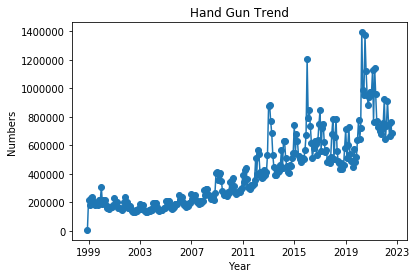

In [20]:
#line curve to show the trend of hand guns


def hg_trend():
    handgun_data = hand_gun['handgun']
    handgun_month = hand_gun['month']

    plt.plot_date(handgun_month, handgun_data, linestyle='solid');
    plt.title('Hand Gun Trend')
    plt.xlabel('Year')
    plt.ylabel('Numbers')
    
    plt.show()

hg_trend()

From the chart above, we observe that the acquisition of hand gun is steadily increasing after a slight dept in 2003 and now has its pick in 2022.

### Overall trend of Long Gun

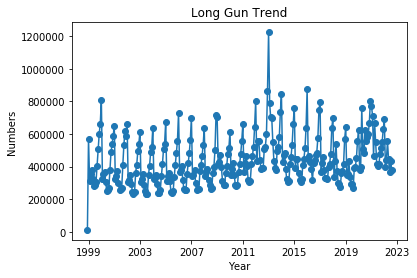

In [21]:
#line curve to show the trend of long guns

def lg_trend():
    longgun_data = long_gun['long_gun']
    longgun_month = long_gun['month']

    plt.plot_date(longgun_month, longgun_data, linestyle='solid');
    plt.title('Long Gun Trend')
    plt.xlabel('Year')
    plt.ylabel('Numbers')

    plt.show()

lg_trend()

From the long gun chart above, we observe that the acquisition of long gun is at peak at 2014

### Overall trend of Other Gun

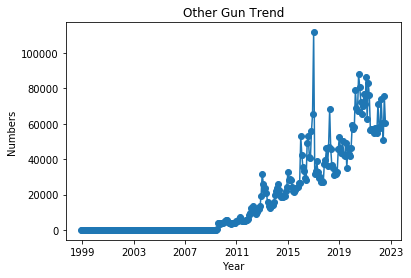

In [22]:
#line curve to show the trend of other guns

def og_trend():
    othergun_data = other_gun['other']
    othergun_month = other_gun['month']

    plt.plot_date(othergun_month, othergun_data, linestyle='solid');
    plt.title('Other Gun Trend')
    plt.xlabel('Year')
    plt.ylabel('Numbers')

    plt.show()

og_trend()

Other gun tends to have relatively low patronages except towards the end of 2016 where the acquisition went up.

### Mean Comparism of the various types of gun

In [23]:
#mean value of the hand gun

handgun_mean = hand_gun['handgun'].mean()
handgun_mean

408634.78245614032

In [24]:
#mean value of the long gun

longgun_mean = long_gun['long_gun'].mean()
longgun_mean

440260.32631578948

In [25]:
#mean value of the other guns

othergun_mean = (other_gun['other'].mean())
othergun_mean

18271.722807017544

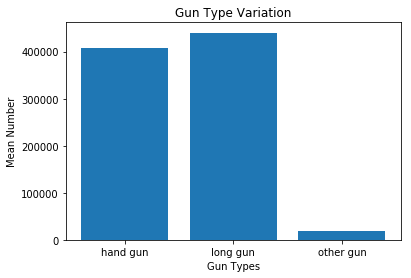

In [26]:
#plot bar graph to compare the average the various types of gun

N = 3
ind = np.arange(N)
x = ['hand gun', 'long gun', 'other gun']

plt.title('Gun Type Variation')
plt.xlabel('Gun Types')
plt.ylabel('Mean Number')

plt.xticks(ind, x)

bar_values = [handgun_mean, longgun_mean, othergun_mean]
bar1 = plt.bar(ind, bar_values)

Mean comparism of the different types of gun acquired. The long gun is most acquired followed by the hand gun and then the other guns.

<a id='conclusions'></a>
## Conclusions

> This project analyse data of the FBI NICS Firearm Background Check. The data presented useful infromation such as date, states, permit, and the various types of gun. The data way cleaned normalize. We found out that `other gun` does not have a rental column leaving us with the information that `other guns` are not available for rent. 

> We explored the line trend of each type of gun to find the gun trends. From the analysis we can conclude that though `long gun` has the highest peak, the `hand gun` is more consistent in growth meaning that in the coming years more of the `hand gun` will be adopted.

> Also looking at the line graph of the `other gun`, we notice a relative low patronage in its usage except for a particular time when it sky rocketed and come down again leaveing us with a conclusion that `other gun` are most needed in demanding spceial caese.


## Limitation

One of the limitations encountered in the course of this project is too many null entry in the data. A significant number of entrys were NaN for the various types of gun especially for the other gun which can inturn lead to sampling error. 



In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0